<a href="https://colab.research.google.com/github/mekhi-woods/HiloCATsSN1991bg/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple snpy

In [ ]:
!git clone https://github.com/mekhi-woods/HiloCATsSN1991bg.git

In [ ]:
"""
Plotting 91bg like 1a to get an idea of what they look like
"""
import matplotlib.pyplot as plt
import numpy as np

FILTER_WHEEL = ['u', 'g', 'r', 'i', 'B', 'V0']

if __name__ == '__main__':
    KrisciunasPath = "/content/HiloCATsSN1991bg/targetLists/91bglike_justnames.txt"
    KrisciunasNames = np.genfromtxt(KrisciunasPath, dtype=str, delimiter=', ')

    allCPSPhot = "/content/HiloCATsSN1991bg/data/CSPdata/SN_photo.dat"
    allCPSPhotData = np.genfromtxt(allCPSPhot, dtype='str')

    names = allCPSPhotData[:,0]
    filters = allCPSPhotData[:,1]
    time = allCPSPhotData[:,2]
    light = allCPSPhotData[:,3]
    err = allCPSPhotData[:,4]

    plt.figure(figsize=(10,6))
    sigma = 1
    for tar in KrisciunasNames:
        for n in range(len(FILTER_WHEEL)):
            # output_names = names[(names == tar) & (filters == FILTER_WHEEL[n])]
            output_light = light[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64')
            output_time = time[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64') + 53000
            output_err = err[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64')
            plt.errorbar(output_time, output_light, yerr=output_err*sigma, fmt='o', label=FILTER_WHEEL[n])

        plt.title(tar); plt.xlabel('Time [MJD]'); plt.ylabel('Intensity [mag]')
        plt.gca().invert_yaxis()
        plt.legend()
        # plt.savefig('save\\'+str(tar)+'.png')
        plt.show()
        break


Fiting data for SN2005bl...
Distance of  SN2005bl : 103.5735221612493 Mpc [ z = 0.0241 ]
Fiting data for SN2005ke...
Distance of  SN2005ke : 18.248051513650285 Mpc [ z = 0.0049 ]
Fiting data for SN2006gt...
Distance of  SN2006gt : 182.3924703304445 Mpc [ z = 0.0448 ]
Fiting data for SN2006mr...
Distance of  SN2006mr : 22.46017060650848 Mpc [ z = 0.0059 ]
Fiting data for SN2007N_...
Distance of  SN2007N_ : 57.23486574797668 Mpc [ z = 0.0129 ]
Fiting data for SN2007al...
Distance of  SN2007al : 54.43517260625391 Mpc [ z = 0.0122 ]
Fiting data for SN2007ba...
Distance of  SN2008bi : 58.5663957812177 Mpc [ z = 0.0134 ]
Fiting data for SN2008bt...
Distance of  SN2008bt : 67.97014912921523 Mpc [ z = 0.0154 ]
Fiting data for SN2009F_...
Distance of  SN2009F_ : 52.84094224129432 Mpc [ z = 0.013 ]


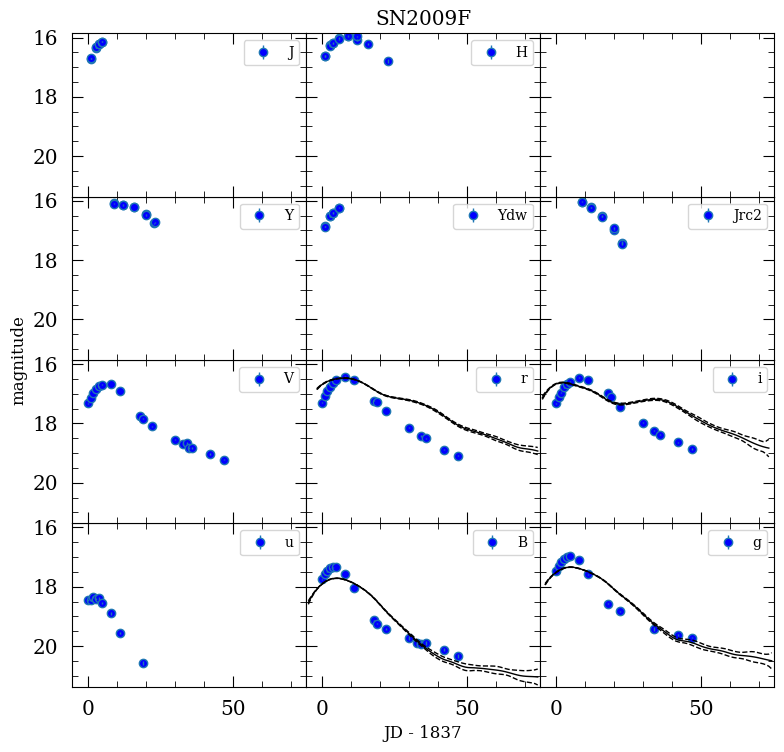

In [23]:
"""
SNooPy fitting on CSP data
"""
import matplotlib.pyplot as plt
import numpy as np
import snpy

def snpy_fit(filePath, model='max_model', shapeParam='dm15', BandsToFit = ['B','g','r','i'], summarize=True):
    s = snpy.get_sn(filePath)

    # Set model parameters
    s.choose_model(model, stype=shapeParam)
    s.set_restbands() # Auto pick appropriate rest-bands

    # Fit data -- using David configurations
    fitargs = {'mangle':1,'calibration':0} # I don't remember what calibration is
    s.fit(BandsToFit,
          dokcorr=True,
          k_stretch=False,
          reset_kcorrs=True,
          **fitargs)

    # Show results
    if summarize:
        s.summary()
        # for param in s.parameters:
        #     print("{} = {} +/- {}".format(param, s.parameters[param], s.errors[param]))
    return s

if __name__ == '__main__':
    # Initalize File -- SN2005ke
    KrisciunasNames = np.genfromtxt("/content/HiloCATsSN1991bg/targetLists/91bglike_justnames.txt", dtype=str, delimiter=', ')
    filePaths = []
    for tar in KrisciunasNames:
        filePaths.append('/content/HiloCATsSN1991bg/data/CSPdata/'+str(tar)+'_snpy.txt')

    # SNeObjs = []
    valid_n = [0,1,3,4,5,6,8,10,11,12]
    for n in valid_n:
        # Enter snpy fit function
        print('Fiting data for '+filePaths[n][39:47]+'...')
        s_n = snpy_fit(filePaths[n], model='EBV_model2', shapeParam='st', BandsToFit = ['B','g','r','i'], summarize=False)

        # Nab paramaters from SNe objects
        mu = s_n.get_distmod()
        d = (10**((mu+5)/5)) / 1e6 # in Mpc
        print('Distance of ', filePaths[n][39:47], ':', d, 'Mpc [ z =', s_n.z,']')




